# EDA 
> This notebook contains preprocessing and visualization of the texts in the data.

> For the visualization spacy, gensim and pyLDAvis is used.

> Spacy: Spacy is an library which is used for advance natural processing. It also contains tokenization, Name Entity Recognition(NER), Parts of Speech tagging(POS), etc

> Gensim: Gensim is used for unsupervised topic modelling and  finding similarity.

> pyLDAviz: It is used to visualize the topic in the LDA model that has been fitted to large corpus. It creates clusters of similar topics. Two or more clusters overlapping means that they are similar. You can change the number of clusters if you want.

In [1]:
# Import the required tools
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
# import plotly.express as px
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
# import spacy
import re
# import pyLDAvis.gensim
# from wordcloud import WordCloud
# import warnings
# warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('data/train.csv')

In [3]:
train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


## Preprocessing

/Users/erbun/.local/share/virtualenvs/Twitter_Sentiment_Analyais-mWwWiToy/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


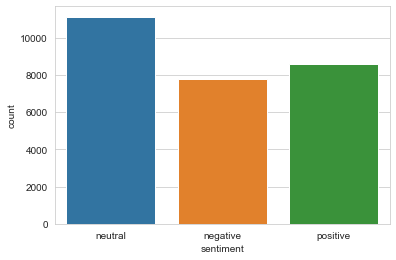

In [4]:
# Check for data imbalance
sns.countplot(train["sentiment"]);

In [5]:
# Check for missing values
train.isna().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

## Remove punctuations and numbers from the data

In [6]:
train.dropna(inplace=True)
train = train.reset_index(drop=True)

In [7]:
def clean_punc(text):
  cleaned_text = re.sub(r'[^\w\s]', '', text)
  cleaned_text = re.sub(r'[0-9]', r'', cleaned_text)
  return cleaned_text

In [8]:
train["cleaned_text"] = np.vectorize(clean_punc)(train["text"])

In [9]:
!python -m nltk.downloader stopwords

/Users/erbun/.pyenv/versions/3.9.1/lib/python3.9/runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /Users/erbun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# Remove stopwords
stop_words = set(stopwords.words("english"))
train["cleaned_text"] = train["cleaned_text"].apply(lambda x : " ".join([w.lower() for w in x.split() if w not in stop_words and len(w) > 3]))

## Tokenize the tweet

In [11]:
texts = train["cleaned_text"].apply(lambda x : x.split())

## Lemmatizing the text

In [12]:
#!nltk.download('stopwords')


In [13]:
lemma = WordNetLemmatizer()
lemming_texts = texts.apply(lambda x:[lemma.lemmatize(i) for i in x])
lemming_texts

LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - '/Users/erbun/nltk_data'
    - '/Users/erbun/.local/share/virtualenvs/Twitter_Sentiment_Analyais-mWwWiToy/nltk_data'
    - '/Users/erbun/.local/share/virtualenvs/Twitter_Sentiment_Analyais-mWwWiToy/share/nltk_data'
    - '/Users/erbun/.local/share/virtualenvs/Twitter_Sentiment_Analyais-mWwWiToy/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
for i in range(len(lemming_texts)):
  lemming_texts[i] = " ".join(lemming_texts[i])

train["cleaned_text"] = lemming_texts

In [ ]:
train

## Data Visualization

In [ ]:
positive_text = train["cleaned_text"][train["sentiment"]=="positive"].apply(lambda x : x.split())
negative_text = train["cleaned_text"][train["sentiment"]=="negative"].apply(lambda x: x.split())
neutral_text = train["cleaned_text"][train["sentiment"]=="neutral"].apply(lambda x:x.split())

In [ ]:
# Merge all the lists into one common list
positive_text = sum(positive_text, [])
negative_text = sum(negative_text, [])
neutral_text = sum(neutral_text, [])

In [ ]:
# Plot the most common words in positive sentiment
freq_pos = nltk.FreqDist(positive_text)
pos_df = pd.DataFrame({
    "words":list(freq_pos.keys()),
    "Count":list(freq_pos.values())
})
common_pos = pos_df.nlargest(columns="Count", n=30)
fig = px.bar(common_pos, x="words", y="Count", labels={"words": "Words", "Count":"Frequency"})
fig.show();

In [ ]:
# Plot the most common words in negative sentiment
freq_neg = nltk.FreqDist(negative_text)
neg_df = pd.DataFrame({
    "words":list(freq_neg.keys()),
    "Count":list(freq_neg.values())
})
common_neg = neg_df.nlargest(columns="Count", n=30)
fig = px.bar(common_neg, x="words", y="Count", labels={"words": "Words", "Count": "Frequency"})
fig.show();

In [ ]:
# Plot the most common words in neutral sentiment
freq_ntl = nltk.FreqDist(neutral_text)
ntl_df = pd.DataFrame({
    "words":list(freq_ntl.keys()),
    "Count":list(freq_ntl.values())
})
common_ntl = ntl_df.nlargest(columns="Count", n=30)
fig = px.bar(common_ntl, x="words", y="Count", labels={"words": "Words", "Count":"Frequency"})
fig.show();

## Wordcloud

In [ ]:
# Most common words in the texts
words = " ".join([text for text in train["cleaned_text"]])
wordclouds = WordCloud(width=900, height=600, random_state=42, max_font_size=110).generate(words)

plt.figure(figsize=(10, 10))
plt.imshow(wordclouds, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Wordcloud for positive words
positive_words = " ".join([word for word in train["cleaned_text"][train["sentiment"] == "positive"]])
wordcloud_pos = WordCloud(width=900, height=700, random_state=42, max_font_size=100).generate(positive_words)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_pos)
plt.axis("off")
plt.show()

## Name Entity Recognition

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
ners = []
for text in train["cleaned_text"].values:
  doc = nlp(text)

  for entity in doc.ents:
    ners.append((entity.text, entity.label_))

In [ ]:
name_entity_df = pd.DataFrame(ners, columns = ["Entity Name", "Entity Label"])
entity_df = name_entity_df.groupby(by=["Entity Name", "Entity Label"]).size().sort_values(ascending=False).reset_index().rename(columns = {0: "Frequency"})

In [ ]:
# Plot the first 50 entities
figure = px.bar(x=entity_df["Entity Label"][:50], y=entity_df["Frequency"][:50]) 
figure.show()

## Topic Modelling

> Topic Modelling is the task of extracting the main topics from the documents.

>For this task LDA is used. LDA is used to classify the text in a document to a particular topic

In [ ]:
texts = train["cleaned_text"].apply(lambda x: x.split())
texts.head()

In [ ]:
# Build the dictionary of words from the document
from gensim import corpora
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [ ]:
# Build the LDA Model 
import gensim
topics = 10
lda = gensim.models.ldamodel.LdaModel(corpus, num_topics=topics, id2word=dictionary, passes=15)
lda.save("LDA_model.gensim")

In [ ]:
display = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
pyLDAvis.display(display)